![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)



<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Advanced Topics in Vision and Language<br> (CV806-Spring2024) </span><h1>

<h2><span style="color:green"> Assignment-01 </span>
</div>

---
---

# Task-01


## Task 1.1

In [10]:
# Task 1.1
import os
import clip
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/16', device)

test_dataset = torchvision.datasets.CIFAR10(root='cifar10',
train=False, download=True, transform=preprocess)
classnames = list(test_dataset.class_to_idx.keys())

# Apply the transform and create a DataLoader
data_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Prepare text inputs
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classnames]).to(device)

# Prepare for calculating accuracy
correct_predictions = 0
total_images = 0

# Iterate over the dataset in batches
for images, labels in data_loader:
    images = images.to(device)
    
    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(images)
        text_features = model.encode_text(text_inputs)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity and get the top prediction
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    top_predictions = similarity.argmax(dim=-1)

    # Update correct predictions
    correct_predictions += (top_predictions == labels.to(device)).sum().item()
    total_images += labels.size(0)

# Calculate and print the top-1 accuracy
accuracy = correct_predictions / total_images
print(f"\nTop-1 Accuracy: {accuracy:.2%}")

Files already downloaded and verified

Top-1 Accuracy: 89.18%


In [1]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')


In [2]:
import cv2

def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(1, frame_count // num_frames)
    
    for i in range(0, frame_count, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)
        else:
            break
    cap.release()
    return frames
    
import torch

def calculate_clip_similarity(text, frames, model, processor):
    inputs = processor(text=text, images=frames, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    text_features = outputs.text_embeds
    image_features = outputs.image_embeds

    # 使用余弦相似度
    cos = torch.nn.CosineSimilarity(dim=1)
    similarity = cos(text_features, image_features.mean(dim=0))  # 取帧特征的平均值
    return similarity.item()




In [3]:
hard_text=['A detailed image of an antique hardcover book with ornate golden embossing on the spine and a slightly worn cover, lying open to reveal crisp, aged pages filled with classic typeface, literature',
'An elegantly crafted fountain pen with a glossy ebony barrel and a fine gold nib, depicted in the act of writing flowing script on a piece of parchment, writing instrument',
'A hyper-realistic image of a shiny red apple, complete with a perfectly detailed stem and a single leaf, the surface reflecting a subtle light, fruit',
'A mechanical keyboard with individual RGB lighting under each key, designed for precision typing and gaming, shown in a dimly lit room enhancing the colorful backlighting, technology',
'An ergonomic optical computer mouse tailored for gaming, featuring customizable side buttons and a glowing RGB light strip, technology',
'A modern office chair with high-tech mesh fabric for breathability, adjustable armrests, and lumbar support, designed for comfort and efficiency in a stylish office setting, furniture',
'A spacious wooden desk with a smooth finish and minimalist design, equipped with compartments for organizing, set up in a well-lit study room, furniture',
'A sleek desk lamp with an LED light, articulated arm, and touch-sensitive control panel that provides adjustable brightness for a home office environment, lighting',
'A durable hiking backpack made from high-strength, water-resistant material, featuring multiple compartments, hydration pack access, and reflective safety strips, ideal for outdoor adventures, equipment',
'A rugged mountain bicycle with a lightweight aluminum frame, hydraulic disc brakes, and aggressive tread on tires, captured on a rocky trail with a backdrop of mountains, vehicle',
'A high-performance cycling helmet with aerodynamic design, integrated ventilation holes, and a visor for sun protection, essential for road safety, protective gear',
'A pair of premium leather gloves, intricately stitched and lined with soft fleece for warmth, shown gripping a wooden walking stick, apparel',
'A pair of robust hiking boots crafted from waterproof leather with reinforced soles for superior traction on uneven terrain, essential for mountain trekking, footwear',
'A luxurious woolen scarf in a deep burgundy color, woven with a subtle herringbone pattern, draped elegantly over a coat in a wintery scene, accessory',
'A classic baseball cap made from durable fabric, featuring a curved brim and an adjustable strap at the back, embroidered with a popular sports team logo, headwear',
'A professional soccer ball designed with pentagonal and hexagonal panels, stitched together to ensure optimal performance and durability on a grassy field, sports equipment',
'A handcrafted wooden baseball bat, polished to a high sheen, shown in mid-swing hitting a baseball in an action-packed game scenario, sports equipment',
'An acoustic guitar with a mahogany body and spruce top, strung with high-quality nylon strings, resting on a wooden stand in a cozy room filled with musical memorabilia, musical instrument',
'A majestic grand piano finished in glossy black lacquer, with the lid open to show its intricate internal strings and hammers, set on a concert stage under a spotlight, musical instrument',
'A professional bass drum as part of a larger drum set, featuring a high-gloss finish and chrome hardware, captured with sticks mid-air, ready to strike in a rhythmic beat, musical instrument',
'A classic violin crafted from aged wood, with a polished finish and fine strings, accompanied by a bow, resting on a velvet-lined case, highlighting its elegance and readiness for a performance, musical instrument',
'A brass trumpet with a polished, reflective surface, showcasing the intricate valves and mouthpiece, set against a backdrop of sheet music, ready for a jazz performance, musical instrument',
'An alto saxophone with a golden finish, detailed engraving on the bell, and leather pads, displayed in a music room setting with soft lighting, emphasizing its sleek design, musical instrument',
'A high-end studio microphone with a large diaphragm and pop filter, mounted on a boom stand in a soundproof recording studio, essential for capturing clear and detailed vocal performances, audio equipment',
'A portable Bluetooth speaker with a durable, waterproof exterior and powerful audio drivers, shown playing music on a sandy beach at sunset, audio equipment','A sleek modern laptop with a high-resolution display and a thin, lightweight design, featuring cutting-edge hardware optimized for professional software applications, shown on a clean, minimalist desk, technology',
'A state-of-the-art digital tablet with a large, vibrant screen, displaying a creative drawing app, held by an artist in a studio filled with natural light, technology',
'A latest model smartphone featuring an edge-to-edge display with no bezels, a triple-camera system on the back, and facial recognition technology, shown in a hand against a cityscape, technology',
'A professional digital camera with a large sensor and a telephoto lens, mounted on a tripod overlooking a scenic landscape at golden hour, capturing stunning details, technology',
'An astronomical telescope set against the backdrop of a starry night sky, with a detailed viewfinder and precision adjustment knobs, aimed at uncovering the mysteries of distant galaxies, scientific instrument',
'A vintage wall clock with Roman numerals and ornate hands, housed in a dark wooden frame, hanging on a pastel-colored wall in a classic living room setting, home decor',
'A luxury wristwatch with a stainless steel band, sapphire crystal face, and a sophisticated chronograph display, shown close-up on a wrist dressed in a fine suit, accessory',
'An elegant silver bracelet with intricate links and a delicate clasp, adorned with small diamonds that catch the light beautifully, displayed on a velvet cushion, jewelry',
'A stunning gold necklace featuring a fine chain and a pendant with an elaborate design, showcased on a mannequin with an evening gown, jewelry',
'A close-up image of a diamond ring with a large, radiant-cut stone set in a platinum band, surrounded by smaller pavé diamonds, presented in an open jewelry box, luxury item',
'A pair of hoop earrings made from polished gold, each adorned with tiny, sparkling gemstones, displayed against a dark, textured background to highlight their elegance, jewelry',
'A pair of aviator sunglasses with polarized lenses and a metal frame, resting on a rocky surface under bright sunlight, fashion accessory',
'A pair of high-performance binoculars with adjustable zoom and focus, used for bird watching, shown in a natural setting with a clear view of distant mountains, outdoor equipment',
'A detailed world map with colorful political boundaries and major cities marked, spread out on a table with a magnifying glass and other travel essentials, educational tool',
'An old-fashioned orienteering compass with a brass casing and a floating needle, lying next to a map on a wooden table in a forest setting, navigation tool',
'A robust LED flashlight emitting a powerful beam of light, designed for durability and long battery life, shown illuminating a dark path at night, safety equipment',
'A high-quality camping tent set up in a serene forest location, with a waterproof canopy and room for two, shown at dusk with a cozy interior glow, outdoor shelter',
'A mummy sleeping bag designed for extreme temperatures, shown partially unzipped and inviting, laid out inside a tent with a view of the starry sky, camping gear',
'A rustic stone fireplace with a roaring fire, providing warmth and light in a cozy cabin setting, the mantelpiece decorated with family photos and vintage ornaments, home comfort',
'A charcoal grill in action, with smoky flavors rising from cooking steaks, depicted in a summer backyard setting with friends gathered around, cooking equipment',
'A stainless steel kettle with a sleek, modern design, boiling water with visible steam, placed on an induction cooktop in a contemporary kitchen, kitchen appliance',
'A ceramic coffee mug filled with steaming hot coffee, the surface adorned with a quaint café logo, positioned on a rustic wooden table alongside a croissant, beverage container',
'A porcelain plate with a delicate floral pattern, set on a dining table with silver cutlery and crystal glasses, ready for an elegant meal, tableware',
'A ceramic soup bowl filled with homemade vegetable soup, steam rising, accompanied by a spoon and fresh bread on a kitchen counter, kitchenware',
'A stainless steel spoon with a polished finish, designed with an ergonomic handle, resting beside a bowl of cereal with milk, captured in the morning light, kitchen utensil']

In [4]:
easy_text=[
'a hardcover book',
'a fountain pen',
'a shiny red apple',
'a mechanical keyboard',
'an optical computer mouse',
'a modern office chair',
'a wooden desk',
'a desk lamp',
'a hiking backpack',
'a mountain bicycle',
'a cycling helmet',
'a pair of leather gloves',
'a pair of hiking boots',
'a woolen scarf',
'a baseball cap',
'a soccer ball',
'a baseball bat',
'an acoustic guitar',
'a grand piano',
'a bass drum',
'a classic violin',
'a brass trumpet',
'an alto saxophone',
'a studio microphone',
'a portable speaker',
'a modern laptop',
'a digital tablet',
'a latest model smartphone',
'a digital camera',
'an astronomical telescope',
'a wall clock',
'a wristwatch',
'a silver bracelet',
'a gold necklace',
'a diamond ring',
'a pair of hoop earrings',
'a pair of aviator sunglasses',
'a pair of binoculars',
'a world map',
'an orienteering compass',
'a LED flashlight',
'a camping tent',
'a mummy sleeping bag',
'a stone fireplace',
'a charcoal grill',
'a stainless steel kettle',
'a ceramic coffee mug',
'a porcelain plate',
'a ceramic soup bowl',
'a stainless steel spoon',
           
]

In [5]:
object_label=['book',
'pen',
'apple',
'keyboard',
'mouse',
'chair',
'desk',
'lamp',
'backpack',
'bicycle',
'helmet',
'glove',
'boot',
'scarf',
'hat',
'ball',
'bat',
'guitar',
'piano',
'drum',
'violin',
'trumpet',
'saxophone',
'microphone',
'speaker',
'laptop',
'tablet',
'smartphone',
'camera',
'telescope',
'clock',
'watch',
'bracelet',
'necklace',
'ring',
'earring',
'sunglasses',
'binoculars',
'map',
'compass',
'flashlight',
'tent',
'sleeping bag',
'fireplace',
'grill',
'kettle',
'mug',
'plate',
'bowl',
'spoon']

In [10]:
'ssd_easd.mp4'.split('_')[0]

'ssd'

In [21]:
import os
def process_folder( models_folder):
    results = []

    models = sorted(os.listdir(models_folder))
    
    for  model_file in zip(models):
        text_description=model_file[0].split('_')[0]
        frames = extract_frames(os.path.join(models_folder, model_file[0]))
        similarity = calculate_clip_similarity(text_description, frames, model, processor)
        results.append(( text_description, similarity))
    
    return results

# Paths to the folders
easy_texts_folder = 'path_to_easy_texts'
easy_models_folder = '/home/dubaiprince/Projects/dreamgaussian/videos_easy/'
hard_texts_folder = 'path_to_hard_texts'
hard_models_folder = '/home/dubaiprince/Projects/dreamgaussian/videos_hard/'

# Calculate similarities
easy_results = process_folder(easy_models_folder)
hard_results = process_folder( hard_models_folder)


In [23]:
easy_results

[('apple', 0.2611784040927887),
 ('backpack', 0.2922461926937103),
 ('ball', 0.2943156957626343),
 ('bat', 0.23714709281921387),
 ('bicycle', 0.23595456779003143),
 ('binoculars', 0.25429102778434753),
 ('book', 0.20973052084445953),
 ('boot', 0.2997477948665619),
 ('bowl', 0.2935858368873596),
 ('bracelet', 0.27861103415489197),
 ('camera', 0.27772536873817444),
 ('chair', 0.2916296422481537),
 ('clock', 0.21693412959575653),
 ('compass', 0.2491467297077179),
 ('desk', 0.23535116016864777),
 ('drum', 0.26641687750816345),
 ('earring', 0.24924059212207794),
 ('fireplace', 0.2541365623474121),
 ('flashlight', 0.26835277676582336),
 ('glove', 0.2758472263813019),
 ('grill', 0.24064527451992035),
 ('guitar', 0.2759804129600525),
 ('hat', 0.3047480881214142),
 ('helmet', 0.2790704071521759),
 ('kettle', 0.2760627567768097),
 ('keyboard', 0.24141032993793488),
 ('lamp', 0.2822698652744293),
 ('laptop', 0.25111421942710876),
 ('map', 0.23780885338783264),
 ('microphone', 0.318778395652771),


In [19]:
hard_results

[('apple', 0.27627652883529663),
 ('backpack', 0.2935245931148529),
 ('ball', 0.2972044348716736),
 ('bicycle', 0.20271611213684082),
 ('binoculars', 0.27071303129196167),
 ('book', 0.20371194183826447),
 ('boot', 0.2960608899593353),
 ('bowl', 0.30212628841400146),
 ('bracelet', 0.27104470133781433),
 ('chair', 0.2997821569442749),
 ('clock', 0.23116672039031982),
 ('compass', 0.24078026413917542),
 ('desk', 0.2297823131084442),
 ('earring', 0.24208350479602814),
 ('fireplace', 0.268025279045105),
 ('flashlight', 0.2628215253353119),
 ('glove', 0.2628844678401947),
 ('grill', 0.2366895079612732),
 ('hat', 0.27659159898757935),
 ('helmet', 0.29985934495925903),
 ('kettle', 0.27119749784469604),
 ('keyboard', 0.23886309564113617),
 ('lamp', 0.29024890065193176),
 ('map', 0.22683948278427124),
 ('mouse', 0.26060083508491516),
 ('mug', 0.27342525124549866),
 ('necklace', 0.22034253180027008),
 ('pen', 0.2623502314090729),
 ('plate', 0.2567319869995117),
 ('ring', 0.24956852197647095),
 ('

In [6]:
video_path = '/home/dubaiprince/Projects/dreamgaussian/videos_easy/apple_easy.mp4'
input_text = 'a shiny red apple'
frames = extract_frames(video_path)
similarity = calculate_clip_similarity(input_text, frames, model, processor)
print("Similarity:", similarity)

Similarity: 0.2737174928188324


In [7]:
video_path = '/home/dubaiprince/Projects/dreamgaussian/videos_hard/apple_hard.mp4'
input_text = 'A hyper-realistic image of a shiny red apple, complete with a perfectly detailed stem and a single leaf, the surface reflecting a subtle light, fruit'
frames = extract_frames(video_path)
similarity = calculate_clip_similarity(input_text, frames, model, processor)
print("Similarity:", similarity)

Similarity: 0.26818186044692993


In [ ]:
# Plotting continued
plt.plot(sorted(common_items), easy_scores, marker='o', linestyle='-', color='b', label='Easy Prompts')
plt.plot(sorted(common_items), hard_scores, marker='x', linestyle='--', color='r', label='Hard Prompts')
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Scores')
plt.title('Comparison of Scores by Prompt Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (36,) and (49,)

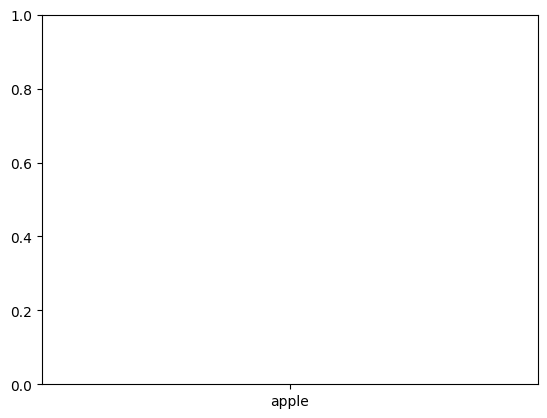

In [27]:
# Extracting common objects (first column)

import matplotlib.pyplot as plt
common_ = [item[0] for item in hard_results]

# Extracting easy scores (second column)
hard_scores = [item[1] for item in hard_results]
easy_scores = [item[1] for item in easy_results]


plt.plot(sorted(common_items), easy_scores, marker='o', linestyle='-', color='b', label='Easy Prompts')
plt.plot(sorted(common_items), hard_scores, marker='x', linestyle='--', color='r', label='Hard Prompts')
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Scores')
plt.title('Comparison of Scores by Prompt Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Note
Export this notebook to PDF and append the PDF to your report after references.